In [0]:
'''
This is a small neural network coded from scratch. It is then compared to a neural network from TensorFlow

It does 4-class-clasification 

It contains just 1 hidden layer with 2 neurons - loss function in this layer is sigmoid loss function

The output layer contains 4 neurons that are used to clasify into 4 classes - uses softmax to clasify
'''

# Import Packages & SetUp

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
randomState = 0

# Data Prepration

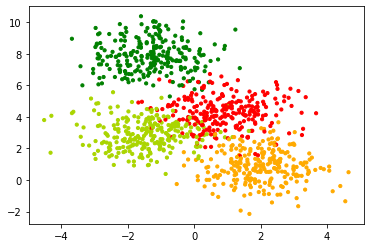

In [5]:
data1, labels1 = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=randomState)
plt.scatter(data1[:,0], data1[:,1], c=labels1, cmap=my_cmap, s=10)
plt.show()

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ ☝ <br>
Data is like this, with each class represented in different colours. There are 2 input parameters

In [6]:
X_train, X_validate, Y_train, Y_validate = train_test_split(data1, labels1, stratify=labels1, random_state=randomState)
print(Y_train.shape, Y_validate.shape)

(750,) (250,)


In [7]:
enc = OneHotEncoder()
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_validate = enc.fit_transform(np.expand_dims(Y_validate,1)).toarray()
print(Y_OH_train.shape, Y_OH_validate.shape)

(750, 4) (250, 4)


# Neural Network - Compressed Version

In [0]:
class FeedForwardNeuralNetwork_compressed :
    def __init__(self):self.W1,self.W2,self.B1,self.B2=np.random.randn(2,2),np.random.randn(2,4),np.zeros((1,2)),np.zeros((1,4))
    def sigmoid(self,X):return(1.0)/(1.0+np.exp(-X))
    def softmax(self,X):return(np.exp(X)/np.sum(np.exp(X),axis=1).reshape(-1,1))
    def grad_sigmoid(self,X):return(X*(1-X))
    def fit(self,X_train,Y_train,epochs=1,learning_rate=1):
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):self.W2,self.W1,self.B2,self.B1=self.W2-learning_rate*np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1).T,self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train)/X_train.shape[0],self.W1-learning_rate*np.matmul(X_train.T,np.multiply(np.matmul(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,self.W2.T),self.grad_sigmoid(self.sigmoid(np.matmul(X_train,self.W1)+self.B1))))/X_train.shape[0],self.B2-learning_rate*np.sum(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,axis=0).reshape(1,-1)/X_train.shape[0],self.B1-learning_rate*np.sum(np.multiply(np.matmul(self.softmax(np.matmul(self.sigmoid(np.matmul(X_train,self.W1)+self.B1),self.W2)+self.B2)-Y_train,self.W2.T),self.grad_sigmoid(self.sigmoid(np.matmul(X_train,self.W1)+self.B1))),axis=0).reshape(1,-1)/X_train.shape[0]
    def predict(self,X_validate):return(np.array(self.softmax(np.matmul(self.sigmoid(np.matmul(X_validate,self.W1)+self.B1),self.W2)+self.B2)).squeeze())

In [0]:
ffnn_comp = FeedForwardNeuralNetwork_compressed()

In [15]:
%%time
ffnn_comp.fit(X_train, Y_OH_train, epochs=2000, learning_rate=0.5)


CPU times: user 2.14 s, sys: 9.7 ms, total: 2.15 s
Wall time: 2.19 s


In [16]:
Y_pred_vector = ffnn_comp.predict(X_validate)
Y_pred = np.argmax(Y_pred_vector,1)
print('Accuracy = ', accuracy_score(Y_validate, Y_pred)*100, '%')

Accuracy =  94.0 %


Accuracy achieved by model = 94.0% <br>
Time to execute the model = **2.19 seconds**

# Comparison with TensorFlow

### Import TensorFlow

In [0]:
import tensorflow as tf
from tensorflow import keras

In [18]:
train_x = X_train
train_y = Y_train
validate_x = X_validate
validate_y = Y_validate
train_y.dtype

dtype('int64')

In [19]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes = 4 )
validate_y = tf.keras.utils.to_categorical(validate_y, num_classes = 4)
validate_y.shape

(250, 4)

### Defining HyperParameters

In [0]:
#Define hyper parameters
training_epochs = 2000
learning_rate = 0.5

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 2

#No of output classes for classification problems
n_classes = 4

### Reset Graph

In [0]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

### Set the Neural Network Graph

In [0]:
model = keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape = (train_x.shape[1],)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(n_nodes_hl1, activation='sigmoid'))

model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [0]:
model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 12        
Total params: 26
Trainable params: 22
Non-trainable params: 4
_________________________________________________________________


In [26]:
%%time
history = model.fit(train_x, train_y, epochs = training_epochs, validation_data = (validate_x, validate_y))

Epoch 1/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.4870 - accuracy: 0.6667 - val_loss: 0.4827 - val_accuracy: 0.6680
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.6853 - val_loss: 0.4787 - val_accuracy: 0.6760
Epoch 3/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.6640 - val_loss: 0.4745 - val_accuracy: 0.6760
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.6760 - val_loss: 0.4706 - val_accuracy: 0.6920
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7013 - val_loss: 0.4666 - val_accuracy: 0.6920
Epoch 6/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.6920 - val_loss: 0.4627 - val_accuracy: 0.6920
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.6960 - val_loss: 0.4587 - val_accuracy: 0.6960
Epoch 

Accuracy achieved by model = 93.6% <br>
Time to execute the model = 3min 36s = **216 seconds**

# Conclusion

As we see, the final accuracy achieved by a Neural Network of TensorFlow is 93.6%

The final accuracy achieved by the model is 94.0% (which is about the same as the TF version)

But the main advantage is achieved in the training time, where TF takes about 3min 36seconds, which is equal to **216 seconds**, to train the same data which could be done in **2.19 seconds**. So for any complex model, it is much easier and **faster** to train that model instead